In [7]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [8]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.5/78.2 GB disk)


In [9]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [10]:
from ultralytics import YOLO

from IPython.display import display, Image

## License Plates Image Dataset from Roboflow

On a dataset’s Universe home page <a> https://universe.roboflow.com/samrat-sahoo/license-plates-f8vsn/dataset/5 </a>, click the Download this Dataset button and select YOLO v8 text format, choose show download code. You will see a code similar to the one below with your api_key. copy and paste it, then execute it, the dataset will be downloaded.

In [11]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="U8kuaBKxymWQBxykY4eS")
project = rf.workspace("samrat-sahoo").project("license-plates-f8vsn")
dataset = project.version(5).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to License-Plates-5 in yolov8:: 100%|██████████| 2180/2180 [00:00<00:00, 3086.89it/s]


## Custom Training

I trained the model on the data woth 25 epochs, feel free to change it.

In [12]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/License-Plates-5/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynami

/content


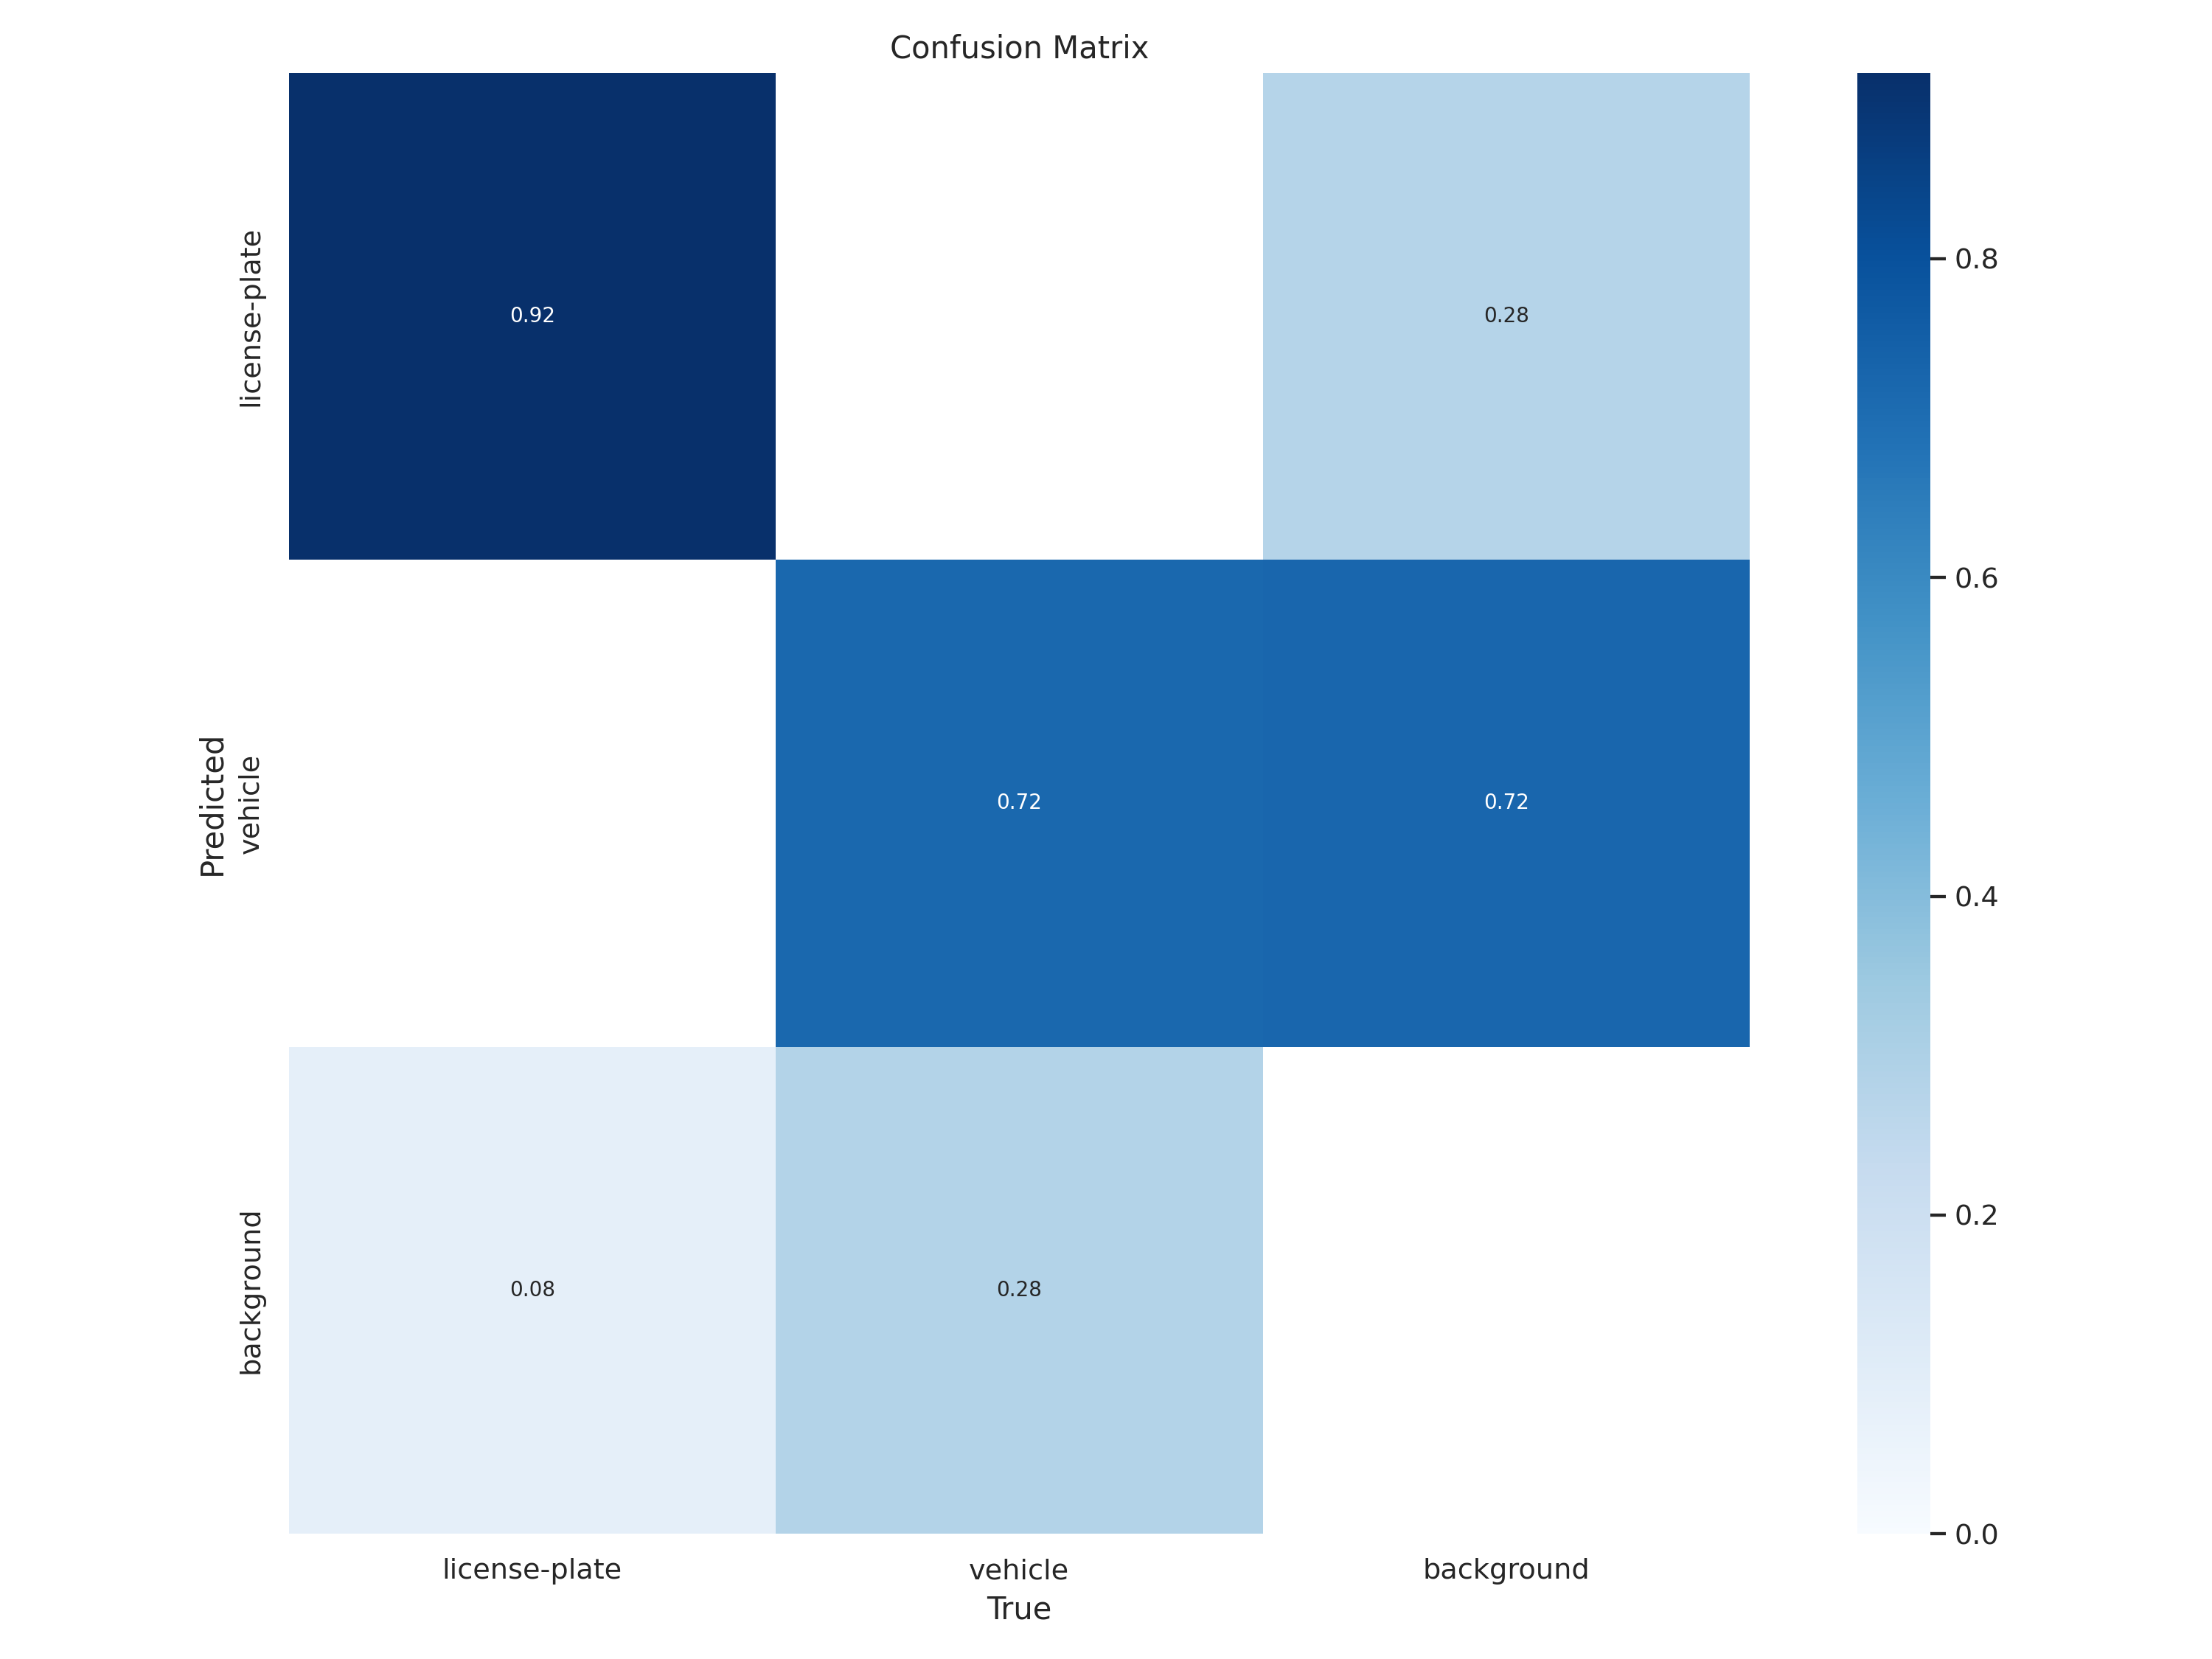

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


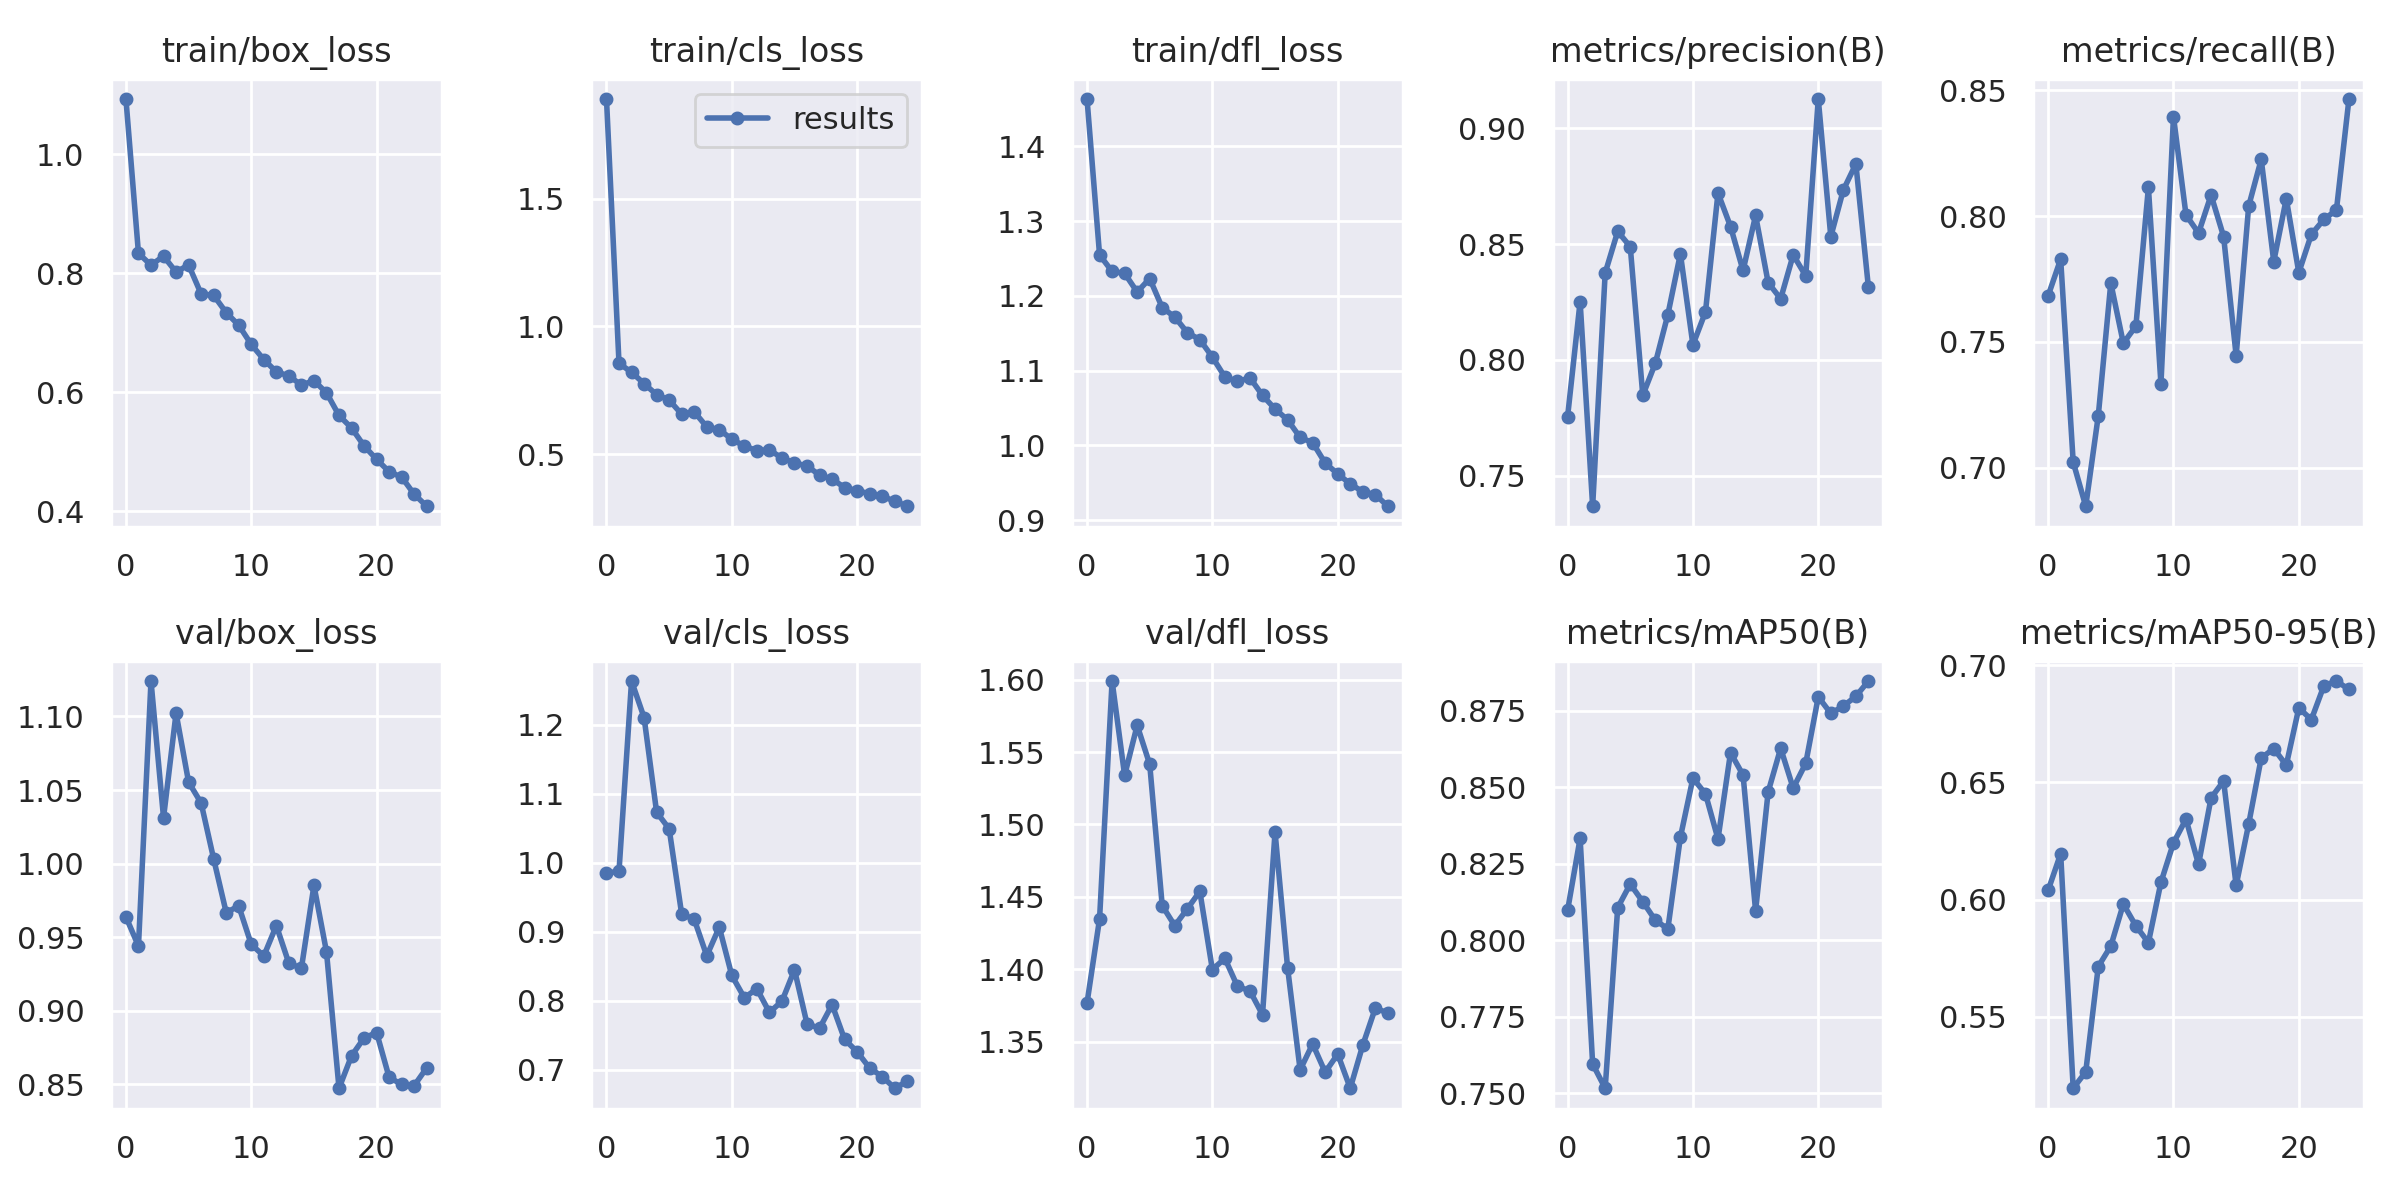

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


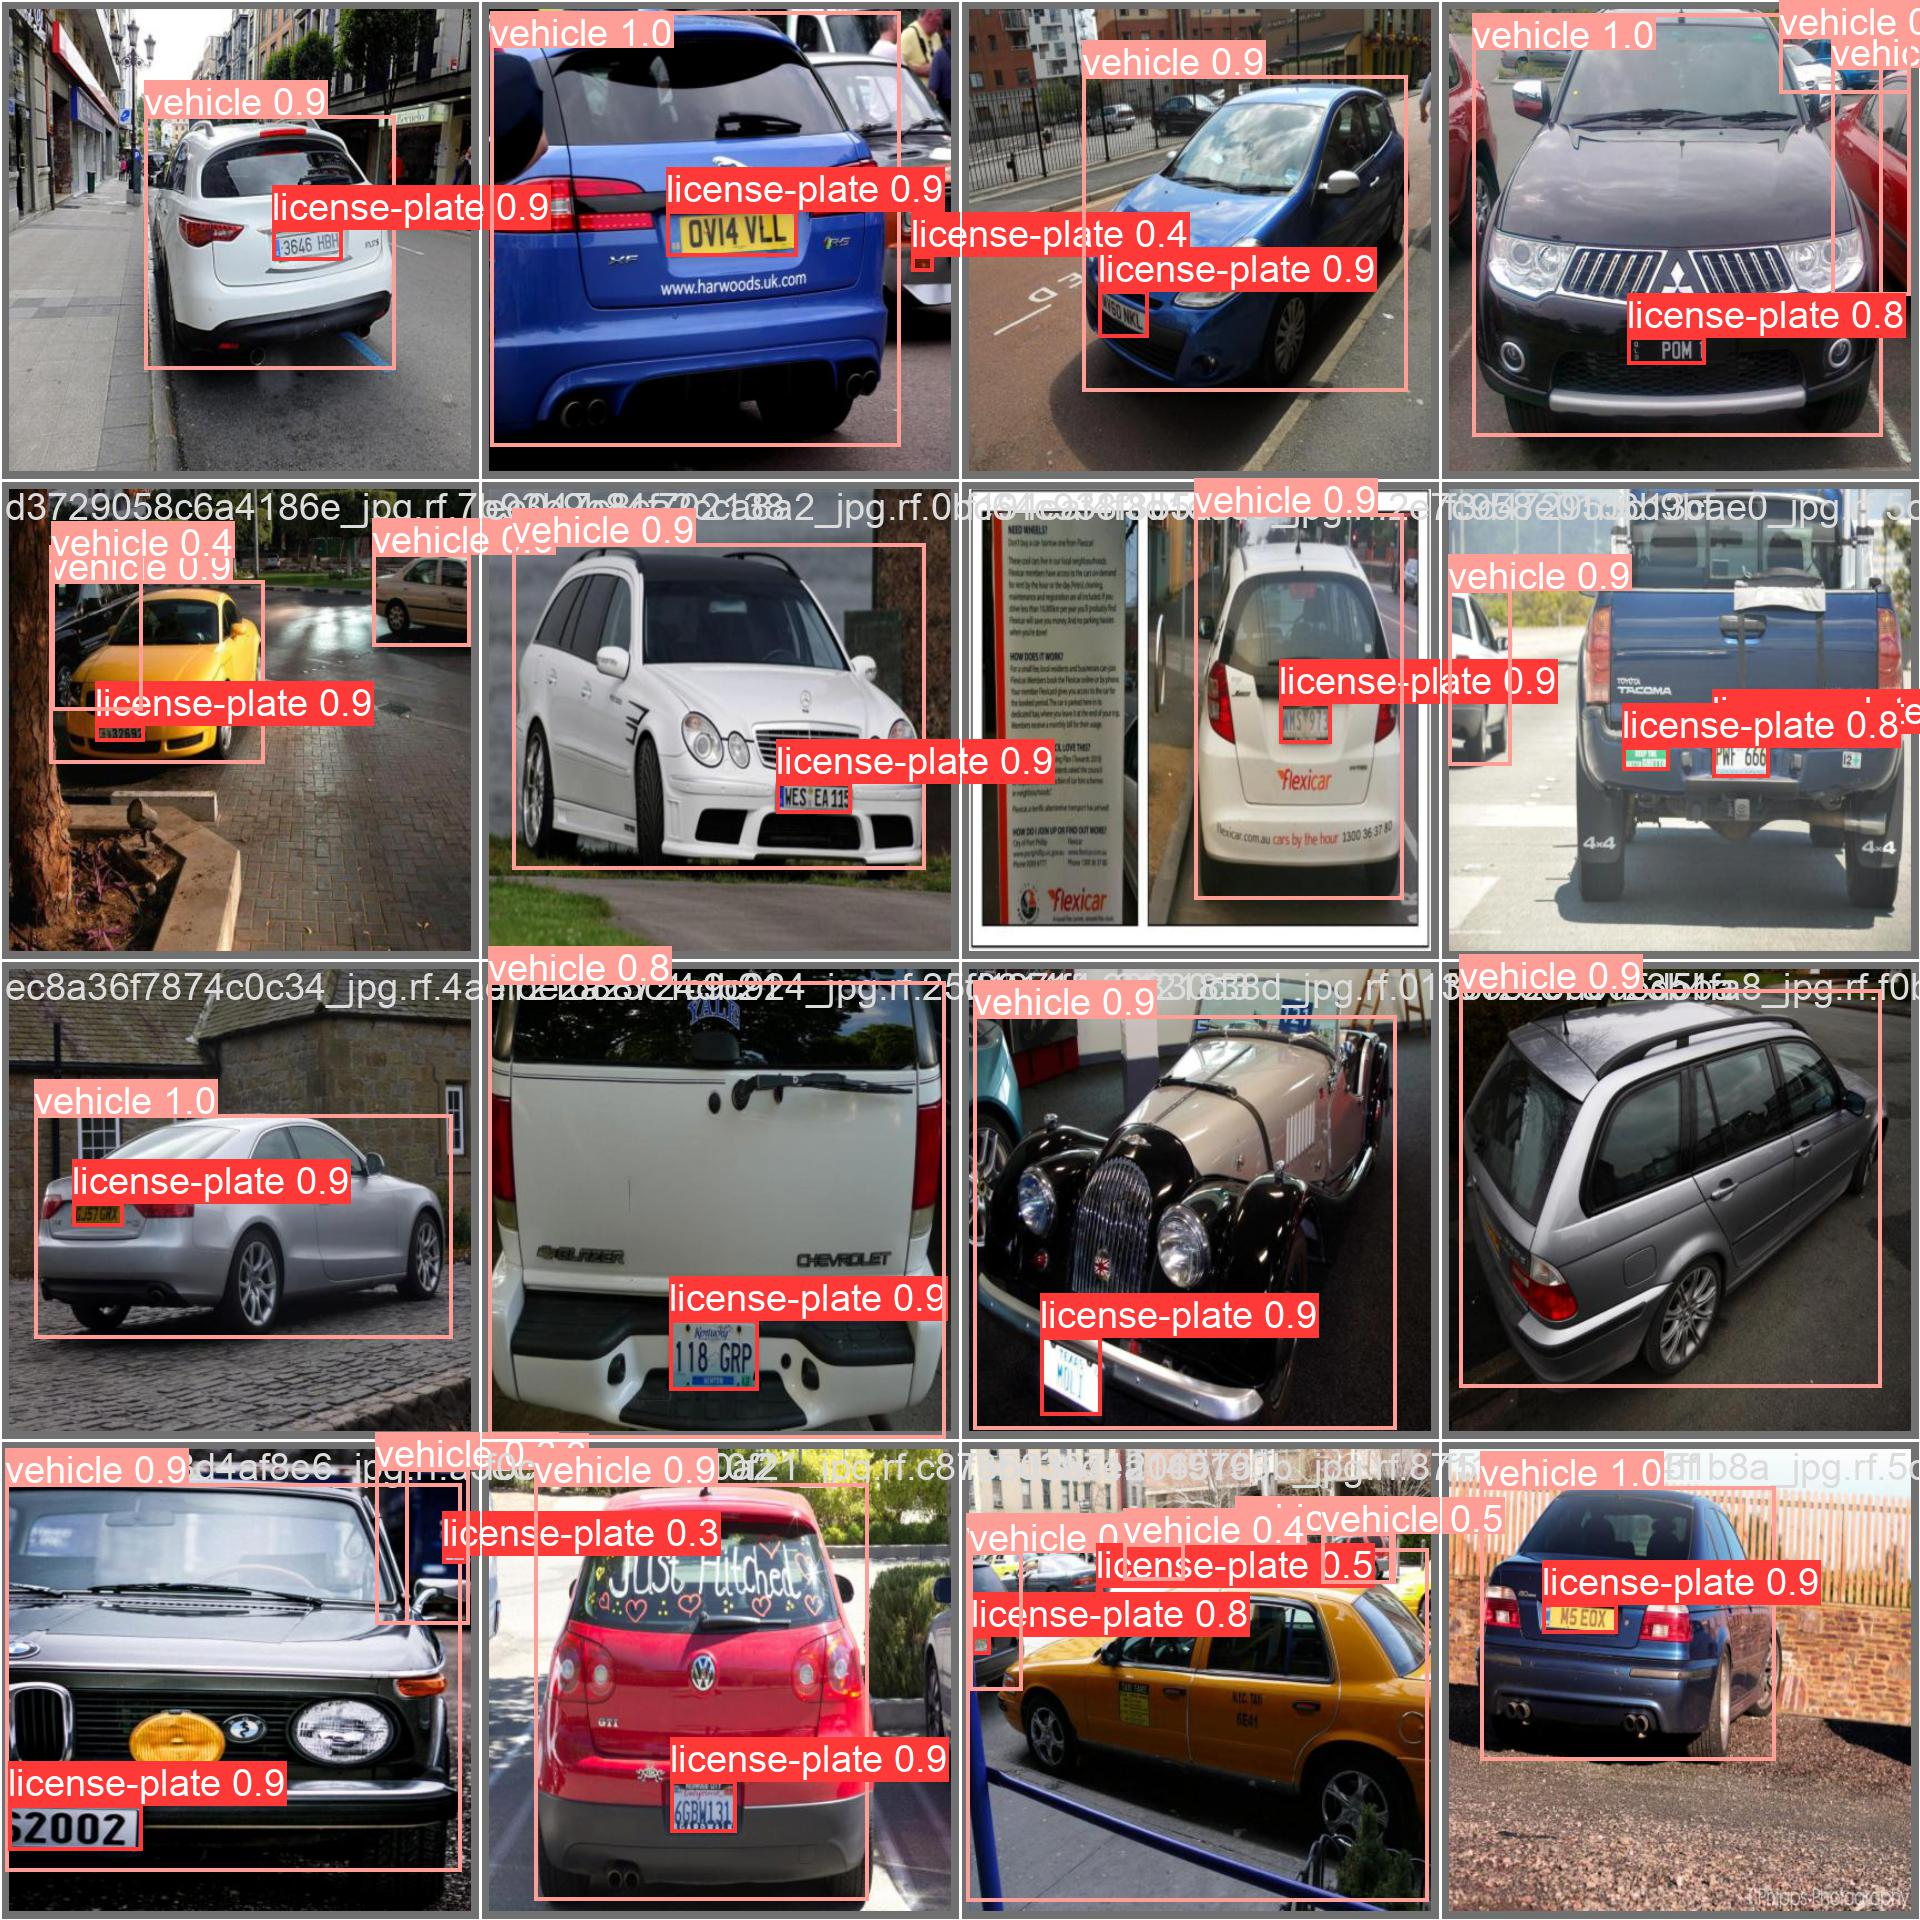

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [16]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-03 20:16:58.660947: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 20:16:59.743424: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/License-Plates-5/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100% 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:07<00:00,  1.41s/it]
                   all         70        218      0.885      0.803       0.88      0.693
         license-plate         70     

## Inference with Custom Model

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-03 20:18:21.664773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 20:18:22.735167: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/35 /content/datasets/License-Plates-5/test/images/b15d6c0bdf90226d_jpg.rf.775557ba6aaf7d76a8d4bb04f66d8fc5.jpg: 800x800 1 license-plate, 1 vehicle, 24.7ms
image 2/35 /content/datasets/License-Plates-5/test/images/b193070a9c45b5ab_jpg.rf.57e5987eb896a7bf9fc7a1a96a660c7e.jpg: 800x800 1 license-plate, 1 vehicle, 24.8ms
image 3/35 /content/datasets/License-Plates-5/test/images/b1a

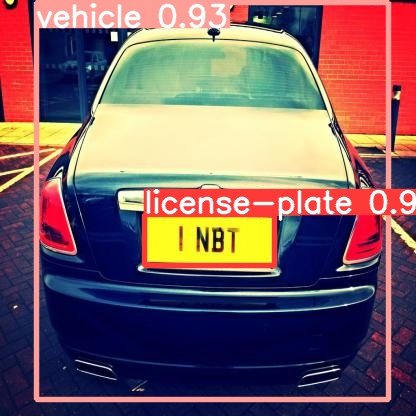

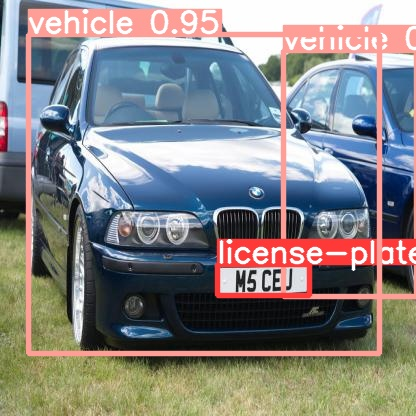

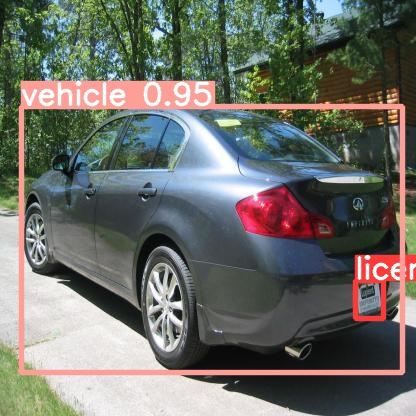

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [23]:
from google.colab import files
import shutil

shutil.make_archive("/content/datasets", 'zip', "datasets")
files.download("datasets.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
shutil.make_archive("/content/runs", 'zip', "runs")
files.download("runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
from google.colab import files

files.download("/content/yolov8s.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
!gdown "https://drive.google.com/uc?id=1P-oVR0J35Dw40lzw47sE19oADSW-tyb1&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1P-oVR0J35Dw40lzw47sE19oADSW-tyb1&confirm=t
To: /content/demo.mp4
100% 9.56M/9.56M [00:00<00:00, 82.6MB/s]


In [31]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="/content/demo.mp4" save=True

/content
2023-08-03 20:45:09.567374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 20:45:10.636974: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/631) /content/demo.mp4: 544x800 2 license-plates, 2 vehicles, 75.0ms
video 1/1 (2/631) /content/demo.mp4: 544x800 2 license-plates, 2 vehicles, 17.6ms
video 1/1 (3/631) /content/demo.mp4: 544x800 1 license-plate, 2 vehicles, 17.6ms
video 1/1 (4/631) /content/demo.mp4: 544x800 1 license-plate, 2 vehicles, 17.7ms
video 1/1 (5/631) /content/demo.mp4: 544x800 2 license-plates